<a href="https://colab.research.google.com/github/Rogerio-mack/Deep-Learning-I/blob/main/T6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Inteligência Artificial</b></font></h1> 
<h1 align=left><font size = 6, style="color:rgb(0,0,0)"><b>Deep Learning</b></font></h1> 

# Modelos Sequencias com PyTorch
Professor(a): Rogério de Oliveira

<br>
<br>

---


# Introdução

Nesta trilha vamos explorar o desenvolvimento de redes profundas com `PyTorch` e conhecer este outro potente framework de deep learning. Você vai aprender a criar modelos sequenciais para classificação e regressão, à exemplo do que vimos com o `TensorFlow`. 

Adicionalmente vamos ver outros recursos do `PyTorch`, como as classes utilitárias `Dataset` e `DataLoader`, que também encontram classes análogas no `TensorFlow` mas que não precisamos empregar até aqui.




# `PyTorch`

O `PyTorch` é uma biblioteca de aprendizado de máquina de código aberto baseada na biblioteca Torch e desenvolvida principalmente pelo laboratório AI Research do FaceBook. Embora tenha uma implementação diferente você pode encontrar quase todos os mesmos recursos que estudamos no `TensorFlow`. O `PyTorch` também implementa uma intraestrutura de programação diferenciável (autograd) sobre tensores, grafos de execução e suporte a execução em diferentes dispositivos (GPU).

A API do `PyTorch` é simples e flexível, sendo a plataforma preferencial até o momento para acadêmicos e pesquisadores no desenvolvimento de novos modelos e aplicativos de aprendizado profundo. Em parte isso também se deve às dificuldades de uso do `TensorFlow` antes da versão 2.0 e sua integração com o `Keras` o que pode vir a mudar este cenário. Mas também na área comercial o `PyTorch` é empregado e recentemente o FaceBook anunciou (Jun 2021) a migração de toda a sua plataforma de IA para `PyTorch`. Ele possui muitas extensões para aplicações específicas (como texto, visão computacional e dados de áudio) e modelos pré-treinados que podem ser usados ​​diretamente. 

A flexibilidade do `PyTorch` implica em uma linguagem em códigos um pouco mais estensos e em geral a curva de aprendizado do `PyTorch` é um pouco mais longa  quando comparado com interfaces mais simples como o `Keras`. A forma mais comum programação com o `PyTorch` é o uso de estensão de classes, em um modo semelhante a programação de subclasses que vimos com `Keras TensorFlow` e é o modo que adotaremos aqui. De qualquer modo, mesmo com o `PyTorch`, a construção de modelos segue a sequência:

1. Defina o modelo.
2. Compile o modelo.
3. Treine o modelo.
4. Avalie o modelo.
5. Faça Predições.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Tensores com `PyTorch`

Os tensores são arrays multidimensionais e também são otimizados para diferenciação automática e execução sobre GPUs e outros dispositivos. Usamos tensores para codificar as entradas e saídas de um modelo, bem como os parâmetros do modelo. Diferentemente da interface mais simples do `Keras`, no caso do `PyTorch`, em muitos casos precisamos fazer a transformação explicitamente dos dados para tensores (e vice-versa) e até mesmo mover os dados e os modelos para os dispositivos que desejamos executar. De resto, o uso de tensores é bastante análogo ao que vimos com o `TensorFlow`. 

In [2]:
import torch
import numpy as np

## Inicializando tensores

Diretamente de dados, 


In [3]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

Ou a partir de arrays `NumPy`,



In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

Ou ainda empregando funções de inicialização de arrays do `PyTorch`,



In [5]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")


Random Tensor: 
 tensor([[0.6553, 0.3029, 0.3072],
        [0.0528, 0.1503, 0.8082]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.1211, 0.6379],
        [0.9239, 0.4084]]) 



## Atributos

Os atributos `shape` e `dtype` são imediatos, e o atributo `device` indica em que dispositivo o tensor está sendo executado (CPU ou qual GPU, por exemplo). 



In [6]:
tensor = torch.rand(3,4)

print(f"Forma do tensor: {tensor.shape}")
print(f"Datatype do tensor: {tensor.dtype}")
print(f"Device onde o tensor está armazenado: {tensor.device}")

Forma do tensor: torch.Size([3, 4])
Datatype do tensor: torch.float32
Device onde o tensor está armazenado: cpu


--------------




## Operações com Tensores

As operações incluem todas as operações comumente empregadas como operações aritméticas, de  álgebra linear e  manipulação de matrizes (transposição, indexação, divisão), amostragem etc. e são muito semelhantes às empregadas em `NumPy` e o `TensorFlow`. Por padrão, tensores são criados na CPU e precisamos mover explicitamente tensores para a GPU usando método ` .to(device)`.

In [7]:
# Configure o Colab para uso de cpu antes de executar
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

In [8]:
tensor.device 

device(type='cpu')

### Indexação e *Slicing*



In [9]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### Aritmética



In [10]:
# Produto de Matrizes y1 = y2
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

# Produto elemento a elemento z1 = z2
z1 = tensor * tensor
z2 = tensor.mul(tensor)



Se você tiver um tensor de um elemento, por exemplo, agregando todos os valores de um tensor em um valor, você pode convertê-lo em um valor numérico Python usando `item()`:



In [11]:
agg = tensor.sum()
agg_item = agg.item()  
print(agg_item, type(agg_item))

12.0 <class 'float'>


## Autograd e Grafos de execução

Na maior parte do tempo estaremos empregando isso de modo implícito na construção dos modelos e não precisamos entrar aqui em detalhes além do que já vimos nas trilhas anteriores. Mas é bom que você saiba que podemos explicitamente indicar se um tensor terá ou não o gradiente automático e que o `PyTorch` também fornece uma função para exibir os grafos de execução.

In [12]:
!pip install torchviz

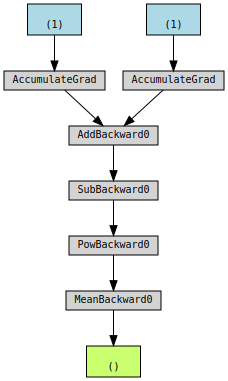

In [13]:
from torchviz import make_dot

a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
c = torch.randn(1)

yhat = a + b 
error = c - yhat
loss = (error ** 2).mean()

make_dot(loss)

Você pode ver mais sobre isso e sobre operações com tensores na documentação do `PyTorch`. Para nossos propósitos essa introdução já é bastante suficiente para começarmos a construir modelos simples com o `PyTorch`. 

# Classificação

Vamos começar fazendo um modelo simples de classificação e entender a forma geral de desenvolvimento de modelos do tipo sequencial e as classes empregadas.

Para esse exemplo vamos criar um conjunto de dados simples com o `make_moons` do `Scikit-learn`.

## Dados

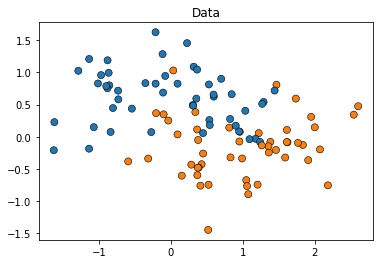

In [14]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.352, random_state=1, n_samples=100)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, marker='o', s=50, edgecolor='k', legend=False).set_title("Data")
plt.show()

### Train e Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Import `torch`

Esses são os imports essenciais para iniciarmos o nosso modelo.

In [16]:
import torch
import torch.nn as nn
from torch.autograd import Variable

## Definindo o Modelo

Um modelo é definido como uma extensão da classe `Module`. Os métodos principais são o método construtor da classe `__init__` que inicializa os elementos da rede e o método `forward`,  

In [17]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 2)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        # x = torch.sigmoid(self.layer3(x))        # você pode querer empregar a sigmoid ou a softmax
        x = torch.softmax(self.layer3(x), dim=1)
        return x

`Linear` implementa uma camada densa e tem como parâmetros básicos o número de elementos de entrada e saída,

```
torch.nn.Linear(in_features, out_features, bias=True)
```
E irá aplicar a transformação:

$$ y = x A^T + b $$

sobre os dados.

$\rightarrow$ Importante: esse módulo suporta tipos `TensorFloat32`.

Embora tenhamos apenas duas classes dados vamos empregar aqui uma classificação multiclasse. Desse modo você pode notar a saída do modelo com dimensão 2, correspondendo às duas classes de dados.


## Inicialização

Não temos aqui uma função `compile` como no `TensorFlow` mas precisamos inicializar nosso modelo, e definir a função de perda e o otimizador que desejamos empregar.

Você encontrará no `PyTorch` otimizadores e funções de perda semelhantes a que vimos no `TensorFlow` como o Adam, SGD para otimizadores e CrossEntropyLoss, BCELoss (Binary Cross Entropy Loss) e MSELoss para funções de perda.

In [18]:
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=2, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=2, bias=True)
)

No `PyTorch` precisamos transformar explicatamente nossas entradas em tensores, tendo ainda atenção nos tipos de dados suportados por cada módulo,

In [19]:
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()

Neste ponto você pode aplicar a rede não treinada a um conjunto de dados e observar as saídas produzidas pelo modelo não treinado,

In [20]:
model(X_train)[0:10] # exibindo somente as 10 primeiras ocorrências

tensor([[0.4993, 0.5007],
        [0.5359, 0.4641],
        [0.5529, 0.4471],
        [0.5380, 0.4620],
        [0.5343, 0.4657],
        [0.5322, 0.4678],
        [0.5013, 0.4987],
        [0.4754, 0.5246],
        [0.4990, 0.5010],
        [0.5325, 0.4675]], grad_fn=<SliceBackward>)

Se você quiser aplicar a uma única instância dos dados é nessário fazer um reshape dos dados compatibilizando a forma de instância com o conjunto de dados,

In [21]:
print('Check shape X_train: ', X_train.shape)
print('Check shape X_train[0]: ', X_train[0].shape)
print('Check shape X_train[0].reshape([1,2]): ', X_train[0].reshape([1,2]).shape)

model( X_train[0].reshape([1,2]) )

Check shape X_train:  torch.Size([70, 2])
Check shape X_train[0]:  torch.Size([2])
Check shape X_train[0].reshape([1,2]):  torch.Size([1, 2])


tensor([[0.4993, 0.5007]], grad_fn=<SoftmaxBackward>)

Entender isso pode ser importante mais adiante.

## Treinamento

O treinamento é bastante semelhante ao que vimos no modelo de subclasses do `TensorFlow` e segue essencialmente:

```
for epoch in EPOCHS:

    # Forward da rede
    y_pred = model(X_train)

    # Cálculo do erro
    loss = loss_fn(y_pred, y_train)
    
    # Zera os gradientes anteriores do otimizador
    optimizer.zero_grad()

    # Recupera os gradientes 
    loss.backward()

    # Atualiza os parâmetros da rede com base nos gradientes
    optimizer.step()
```
Sendo os demais comandos opcionais para exibição do histórico do treinamento.


In [22]:
import tqdm # somente para display da evolução do loop

EPOCHS  = 100

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 948.59it/s]


A instrução `with torch.no_grad()` indica ao `PyTorch` que não precisará obter os gradientes das operações aninhadas.

### Curva de Aprendizado

Obtemos então a Curva de Aprendizado. Embora não faça parte do treinamento da rede é algo comumente necessário para o ajuste do modelo e que frequentemente implementamos.

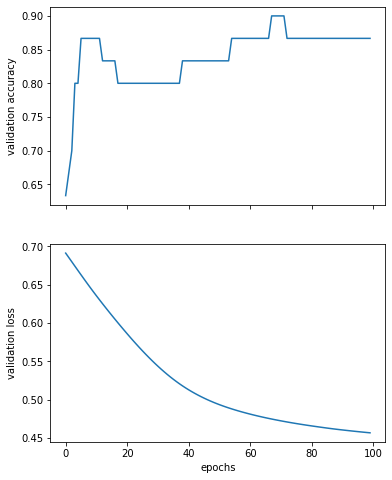

In [23]:
def plot_history(loss_list,  accuracy_list):
  fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 8), sharex=True)

  ax1.plot(accuracy_list)
  ax1.set_ylabel("validation accuracy")
  ax2.plot(loss_list)
  ax2.set_ylabel("validation loss")
  ax2.set_xlabel("epochs")
  plt.show()

  return

plot_history(loss_list,  accuracy_list) 

## Predição

Podemos agora aplicar o nosso modelo para todo o nosso conjunto de dados e ver os acertos da classificação obtida pela rede.

In [24]:
X_ = Variable(torch.from_numpy(X)).float()
y_pred = model(X_)

In [25]:
y_pred = np.argmax( y_pred.detach().numpy(), axis=1 )

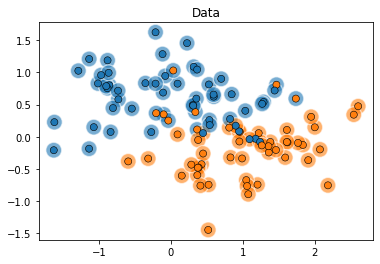

In [26]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, marker='o', s=250, legend=False, alpha=0.6)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, marker='o', s=50, edgecolor='k', legend=False).set_title("Data")

plt.show()

Os pontos que o modelo retorna a classe correta apresentam a mesma cor no cento e no contorno. Um resultado bastante bom, não?

# Regressão

Vamos criar agora um modelo simples de regressão. Começaremos empregando o mesmo conjunto de dados gerado a partir da função $cos(\frac{3}{2}  \pi x)$  da trilha anterior. 

## Dados

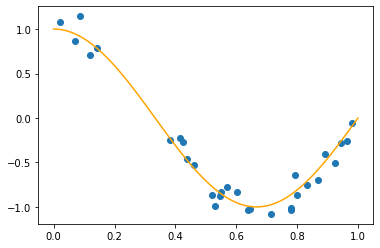

In [27]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30

x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1

plt.scatter(x,y)
xr = np.linspace(0,1,100)
sns.lineplot(x=xr,y=true_fun(xr),color='orange')

plt.show()

### Normalização

In [28]:
X = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

### Train e Test Split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Import `torch`

In [30]:
import torch
import torch.nn as nn
from torch.autograd import Variable

## Definindo o Modelo

Também construímos aqui um modelo de 3 camadas, mas agora nossa saída é um único neurônio e deve retornar o valor da transformação linear sem qualquer função de ativação adicional.

In [31]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 10)
        self.layer2 = nn.Linear(10, 8)
        self.layer3 = nn.Linear(8, 1)
        
    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = torch.tanh(self.layer2(x))
        x = self.layer3(x)
        return x

## Inicialização

Do mesmo modo como fizemos para nosso modelo de classificação precisamos inicializar a rede e transformar nossas entradas em tensores.

In [32]:
model     = Model(1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
loss_fn   = nn.MSELoss()
model

Model(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=1, bias=True)
)

Vamos empregar aqui o otimizador SGD e, sendo um modelo de regressão, é mais apropriado empregar uma função custo de média do erro quadrático.

In [33]:
X_train = Variable(torch.from_numpy(X_train)).float()
print( 'Type: ', type(X_train), '\nShape: ',  X_train.shape, '\nContent: ',  X_train[0:5] )
y_train = Variable(torch.from_numpy(y_train)).float()
X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).float()

X_train = X_train.unsqueeze(-1) # o mesmo que X_train.reshape(len(X_train),1)
y_train = y_train.unsqueeze(-1)
X_test = X_test.unsqueeze(-1)
y_test = y_test.unsqueeze(-1)

print( 'Type: ', type(X_train), '\nShape: ',  X_train.shape, '\nContent: ',  X_train[0:5] )

Type:  <class 'torch.Tensor'> 
Shape:  torch.Size([21]) 
Content:  tensor([ 0.8977,  0.4785, -1.5625, -1.6520,  1.0311])
Type:  <class 'torch.Tensor'> 
Shape:  torch.Size([21, 1]) 
Content:  tensor([[ 0.8977],
        [ 0.4785],
        [-1.5625],
        [-1.6520],
        [ 1.0311]])


Note que agora todos os dados são `float` e fazemos o reshape dos dados para um formato análogo ao que empregamos antes.

Novamente nosso modelo está pronto para aplicarmos a rede não treinada a um conjunto de dados e observarmos as saídas do modelo antes do treinamento,

In [34]:
model(X_train)[0:5] # Exibindo apenas as 5 primeiras ocorrências

tensor([[-0.1325],
        [-0.1247],
        [-0.0631],
        [-0.0585],
        [-0.1355]], grad_fn=<SliceBackward>)

## Treinamento

O treinamento não tem diferença com relação ao modelo de classificação, mas precisamos ajustar a coleta do histórico de treinamento para os dados referentes a regressão.

In [35]:
def plot_history(loss_train, loss_val):

  plt.plot(loss_train, label = 'Train Error')
  plt.plot(loss_val, label = 'Val Error')
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.legend()

  plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 1568.73it/s]


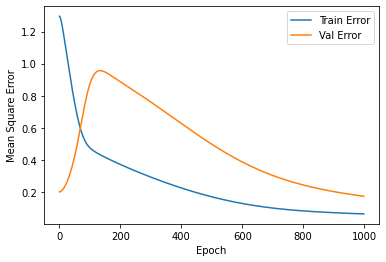

In [36]:
import tqdm

EPOCHS  = 1000

loss_train    = np.zeros((EPOCHS,))
loss_val      = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_train[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        loss = loss_fn(y_pred, y_test)
        loss_val[epoch] = loss.item()

plot_history(loss_train,  loss_val) 



## Predição

Finalmente, podemos empregar o modelo para a predição de um range de valores e observar o resultado obtido.

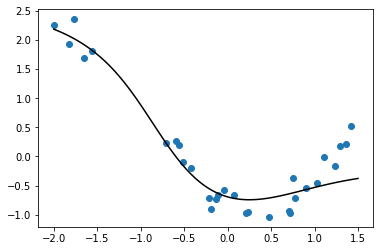

In [37]:
x_pred = np.linspace(-2,1.5,100)
y_pred = model(Variable(torch.from_numpy(x_pred)).float().unsqueeze(-1))
plt.scatter(X,y)
sns.lineplot(x=x_pred,y=y_pred.detach().numpy()[:,0],color='k')
plt.show()

# Exemplo: Classificação `biopsy`

Os exemplos acima são bastante simples mas ajudam a compreender como criar modelos com `PyTorch` e entender a flexibilidade que ele fornece na implementação de redes profundas. 

Vamos ver uma solução mais elaborada empregando as classes `Dataset`, `DataLoader` e o uso de GPU com o `PyTorch`. Embora possamos desenvolver modelos sem o uso dessas classes como fizemos acima, elas desempenham um papel fundamental em aplicações mais complexas e profissionais e são bastante empregadas. O `TensorFlow` também implementa classes semelhantes e, depois de aprender a empregá-las no `PyTorch`, você pode consultar a documentação do `TensorFlow` para encontrar as mesmas funções.

Vamos empregar aqui o mesmo conjunto de dados `biopsy` empregado para classificação, `biopsy` na trilha anterior.



## Dataset

No `PyTorch`, um conjunto de dados é representado por uma classe `Python` que herda da classe `Dataset`. Esse `Dataset` pode ter várias formas, mas você pode pensar, no caso de um problema de classificação, como uma lista de tuplas `Python` em que cada tupla é da forma (*features*, *classe*).

Os métodos essencias dessa classe são:

* __init__(self) : Construir uma lista de tuplas. Um arquivo CSV que será carregado e processado; dois tensores , um para *features*  e outro para *classes*; e muitas outras coisas a depender do problema.

* __get_item__(self, index): permite que o conjunto de dados seja indexado  para que possa funcionar como uma lista (dataset[i]) e deve retornar uma tupla (*features*, *classe*) correspondente ao índice solicitado. 

* __len__(self): retorna o tamanho de todo o conjunto de dados.


Assim para nosso exemplo `biopsy` podemos, por exemplo, construir:

In [2]:
import pandas as pd
from torch.utils.data import Dataset
from sklearn.preprocessing import LabelEncoder

class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = pd.read_csv(path, header=0, index_col=0)
        
        # some preparation 
        df = df.drop(columns=['ID'])
        df.V6 = df.V6.fillna( df.V6.mean() )

        # store the inputs and outputs
        self.X = df.values[:, :-1]
        self.y = df.values[:, -1]

        # ensure input data is floats
        self.X = self.X.astype('float32')

        # label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(self.y)
        self.y = self.y.astype('float32')
        self.y = self.y.reshape((len(self.y), 1))


    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

path = 'https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv'
dataset = CSVDataset(path)



Cada uma das __len__() tuplas é então da forma (*features*, *classe*):

In [3]:
print( 'Número de tuplas:' , dataset.__len__() ) 
print( dataset[0] ) 
# 
print( dataset.__getitem__(0) )

Número de tuplas: 699
[array([5., 1., 1., 1., 2., 1., 3., 1., 1.], dtype=float32), array([0.], dtype=float32)]
[array([5., 1., 1., 1., 2., 1., 3., 1., 1.], dtype=float32), array([0.], dtype=float32)]


E podemos ainda referenciar somente as *features* (os atributos `X`) ou às *classes* (atributo `y`): 

In [4]:
for i in range(2):
  print( dataset.X[i], dataset.y[i] )

[5. 1. 1. 1. 2. 1. 3. 1. 1.] [0.]
[ 5.  4.  4.  5.  7. 10.  3.  2.  1.] [0.]


Podemos agora separar no nosso `Dataset` os conjuntos de dados de treinamento e teste por qualquer método que quisermos e poderíamos até mesmo ter adicionado um método `__get__train_test_split` à nossa classe `Dataset`. Aqui seria suficiente empregarmos a função `train_test_split` do `Scikit-learn` que você já conhece.

In [5]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(dataset, test_size=0.3, random_state=123)

Mas podemos também empregar o módulo `random_split` do próprio `PyTorch`,

In [6]:
from torch.utils.data.dataset import random_split
import torch

train_len = int(0.7*len(dataset))
test_len = len(dataset) - train_len

train_dataset, test_dataset = random_split(dataset,[train_len,test_len], generator=torch.Generator().manual_seed(123),)

E existem muitas outras funções de transformação e manipulação de dados, incluindo imagens, para os quais essas classes são ainda mais fundamentais.

Ao final nossos conjuntos `train` e `test` seguem sendo tuplas do tipo (*features*, *classe*):

In [7]:
train_dataset[0:5]

[array([[ 3.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,  1.],
        [ 1.,  3.,  3.,  2.,  2.,  1.,  7.,  2.,  1.],
        [10.,  3.,  3.,  1.,  2., 10.,  7.,  6.,  1.],
        [ 1.,  1.,  1.,  1.,  2.,  1.,  3.,  2.,  1.],
        [ 5.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.]], dtype=float32),
 array([[0.],
        [0.],
        [1.],
        [0.],
        [0.]], dtype=float32)]

Como você pode ver essa classe é bastante flexível e podemos construir *quaisquer* operações sobre os dados para criarmos as tuplas de treinamento do modelo.

## DataLoader 

Até agora, usamos todos os dados de treinamento em cada etapa do treinamento, isto é, cada iteração para ajuste dos pesos faz o forward da rede para todos os dados, calcula o erro e com os gradientes ajusta os pesos. Nosso *batch* (ou lote) de treinamento é todo o conjunto de dados. Isso pode ser feito quando a quantidade de dados é bastante pequena mas, em casos mais práticos, devemos empregar *mini-batchs* para o ajuste dos parâmetros da rede a cada iteração. 

A classe da DataLoader do `PyTorch` faz este trabalho para nós. Ele recebe um `Dataset` e o tamanho do lote desejado, e cria um objeto que se comportará como um iterador para podermos fazer um loop sobre ele e processar cada mini-batch pode vez.


In [8]:
from torch.utils.data import DataLoader

train = DataLoader(train_dataset, batch_size=16, shuffle=True)


Podemos agora iterar sobre esses dados!

In [9]:
X_train, y_train = next(iter(train))

print( X_train )
print( y_train )

tensor([[ 3.,  3.,  2.,  1.,  2.,  3.,  3.,  1.,  1.],
        [ 5.,  1.,  1.,  3.,  2.,  1.,  1.,  1.,  1.],
        [ 6.,  9.,  7.,  5.,  5.,  8.,  4.,  2.,  1.],
        [ 1.,  1.,  1.,  3.,  2.,  1.,  1.,  1.,  1.],
        [ 8.,  4.,  4.,  1.,  2.,  9.,  3.,  3.,  1.],
        [ 1.,  1.,  1.,  1.,  2.,  3.,  3.,  1.,  1.],
        [ 2.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  1.],
        [10.,  4.,  7.,  2.,  2.,  8.,  6.,  1.,  1.],
        [10.,  3.,  4.,  5.,  3., 10.,  4.,  1.,  1.],
        [10., 10., 10.,  4.,  8.,  1.,  8., 10.,  1.],
        [ 3.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,  1.],
        [ 4.,  7.,  8.,  3.,  4., 10.,  9.,  1.,  1.],
        [ 1.,  2.,  3.,  1.,  2.,  1.,  1.,  1.,  1.],
        [ 3.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [10., 10., 10.,  8.,  6.,  1.,  8.,  9.,  1.],
        [ 8., 10., 10.,  8.,  7., 10.,  9.,  7.,  1.]])
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
       

O restante seguirá bem de perto o modelo de classificação que criamos.

## Definindo o modelo

Poderíamos empregar aqui o mesmo modelo anterior de classificação multiclasse e emprega-lo pode ser um bom exercício para você. Mas temos apenas duas classes de saída nos dados e podemos então empregar uma classificação binária. A saída de rede é então um único neurônio que retornará a *chance* (~ probabilidade) de uma classe de dados tendo como saída a função logística. 



In [10]:
import torch.nn as nn

class MLP(nn.Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()

        self.hidden1 = nn.Linear(n_inputs, 10)
        self.act1 = nn.ReLU()

        self.hidden2 = nn.Linear(10, 8)
        self.act2 = nn.ReLU()

        self.hidden3 = nn.Linear(8, 1)
        self.act3 = nn.Sigmoid()

    # forward  
    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        X = self.act3(X)
        return X

        

## Inicialização

Agora empregaremos a função de custo *Binary Cross Entropy Loss* e o otimizador Adam, e inicializamos nosso modelo.

In [29]:
from torch.optim import SGD, Adam

model = MLP(9)
loss_fn = nn.BCELoss()
# optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9) # Você pode optar por esse se quiser
optimizer = Adam(model.parameters(), lr=0.001)

print( model )

MLP(
  (hidden1): Linear(in_features=9, out_features=10, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=10, out_features=8, bias=True)
  (act2): ReLU()
  (hidden3): Linear(in_features=8, out_features=1, bias=True)
  (act3): Sigmoid()
)


As transformações para tensores são são feitas pelas classes `Dataset` e `DataLoader` e você pode aplicar o modelo ainda não treinado a um *lote* da próxima iteração diretamente:

In [30]:
X_train, y_train = next(iter(train))

model(X_train)

tensor([[0.5236],
        [0.5675],
        [0.5433],
        [0.6136],
        [0.5597],
        [0.5384],
        [0.5298],
        [0.5323],
        [0.6944],
        [0.5385],
        [0.5560],
        [0.5580],
        [0.6286],
        [0.5916],
        [0.5263],
        [0.5557]], grad_fn=<SigmoidBackward>)

## Treinamento

Apenas para tornar o código mais simples não iremos gerar o histórico de acuracidade como antes e iremos apenas exibir o evolução da função de custo.

In [31]:
EPOCHS = 100
loss_list = np.zeros((EPOCHS,))

for epoch in range(EPOCHS):
    loss_batch = 0

    for x_batch, y_batch in train:
        # compute the model output
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        # Zero gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_batch = loss_batch + loss.item()
    
    loss_list[epoch] = loss_batch / len(x_batch)

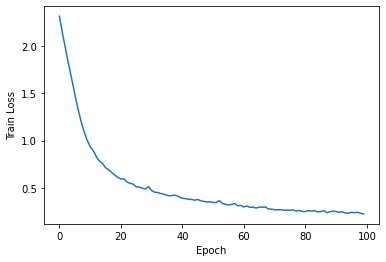

In [32]:
def plot_history(loss_list):

  plt.plot(loss_list)
  plt.ylabel("Train Loss")
  plt.xlabel("Epoch")
  plt.show()

plot_history(loss_list) 

## Predição

Temos várias formas de fazer predições e analisar os resultados. Uma forma simples, neste caso, parecer ser criarmos um lote como todos os dados de teste e aplicar o modelo,

In [36]:
test = DataLoader(test_dataset, batch_size=len(test_dataset))
xx_test, yy_test = next(iter(test))

In [37]:
yy_pred = model(xx_test).round()

Lembre que a saída é um valor entre $[0,1]$ indicando a chance da classe ser $0$ e, portanto, o arredondamento produz o valores de classe 0 e 1 que você pode empregar para verificar a acuracidade contra o conjunto de teste.

In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(yy_test.detach().numpy(), yy_pred.detach().numpy()))

0.9809523809523809


O *detach* dos valores é necessário apenas por que o `Scikit-learn` não opera diretamente com os tensores.

## GPU

Para completarmos o nosso modelo mais elaborado vamos configurá-lo para processar os tensores e o modelo nas GPUs disponíveis. 

No `PyTorch` precisamos explicitamente direcionar os elementos para empregar a GPU. Esse comando irá setar a variável `device` com a GPU se ela estiver disponível e podemos empregá-la com a instrução `.to(device)` para direcionar os elementos para o dispositivo.

In [39]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cpu device


### Movendo o Modelo

O parâmetros do modelo (os pesos) são tensores e passarão a ser executados no dispositivo indicado.

In [43]:
model = MLP(9).to(device)
optimizer = Adam(model.parameters(), lr=0.001) # o otimizador também precisa ser reinicializado!

print( model )

MLP(
  (hidden1): Linear(in_features=9, out_features=10, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=10, out_features=8, bias=True)
  (act2): ReLU()
  (hidden3): Linear(in_features=8, out_features=1, bias=True)
  (act3): Sigmoid()
)


### Movendo os dados `x_batch` e `y_batch`

Como o modelo e os dados precisam estar no mesmo contexto para serem processados é necessário mover os tensores de dados também para o device.

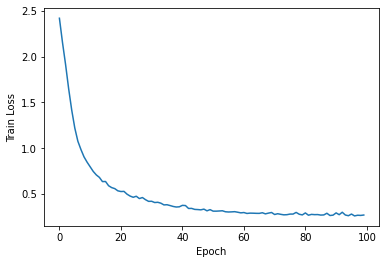

In [44]:
EPOCHS = 100
loss_list = np.zeros((EPOCHS,))

for epoch in range(EPOCHS):
    loss_batch = 0

    for x_batch, y_batch in train:

        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        # compute the model output
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        # Zero gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_batch = loss_batch + loss.item()
    
    loss_list[epoch] = loss_batch / len(x_batch)

plot_history(loss_list)     

O resultado é análogo ao que fizemos antes.

In [45]:
test = DataLoader(test_dataset, batch_size=len(test_dataset))
xx_test, yy_test = next(iter(test))

In [46]:
yy_pred = model(xx_test).round()

In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(yy_test.detach().numpy(), yy_pred.detach().numpy()))

0.9761904761904762


# Síntese

Nesta trilha você aprendeu a criar modelos de redes profundas com `PyTorch` para predição de valores de classificação e regressão. 

Muito do quê aprendemos a empregar aqui com o `PyTorch` é semelhante ao quê você aprendeu com o `TensorFlow` nas trilhas anteriores, e você pôde se concentrar apenas nas diferenças da implementação, como a necessidade de indicar explicitamente os dispositivos de execução, executar as transformações dos dados para tensores e as diferentes instruções empregadas.

Pudemos ainda explorar outras classes do `PyTorch`, como as classes `Dataset` e `DataLoader` para tratamento de dados. Essas mesmas funções também podem ser encontradas no `TensorFlow` e desempenham um papel muito importante no tratamento de dados mais complexos, em especial para dados multimídia.

Como você pôde observar que o `PyTorch` é um framework eficiente de programação diferenciável sobre tensores do mesmo modo que o `TensorFlow` e que fornece uma interface suficiente amigável e bastante flexível para a construção de modelos de redes profundas. Ele oferece muitos outros recursos e você pode encontrar na documentação do `PyTorch` implementações das funções mesmas funções que empregamos antes com o `TensorFlow`, como Dropout ou Early Stopping, que não exploramos aqui por brevidade. Mas existem muitos outros recursos que não tratamos aqui nos dois pacotes.









## Para saber mais

Um tópico avançado que não tratamos aqui é a inicialização dos parâmetros da rede que podem ter um grande efeito em modelos de redes mais profundas. Tanto o `PyTorch` como o `TensorFlow` implementam diferentes técnicas e você pode começar pelos seguintes tutoriais:

* Para `TensorFlow`: **Weight initialization tutorial in TensorFlow**, https://adventuresinmachinelearning.com/weight-initialization-tutorial-tensorflow/
* Para `PyTorch`: **How to initialize model weights in PyTorch**, https://www.askpython.com/python-modules/initialize-model-weights-pytorch

Os dois tutoriais a seguir também trazem implementações bastante semelhantes a que fizemos aqui e podem ser úteis para você:

* **PyTorch Tutorial: How to Develop Deep Learning Models with Python** https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/

* **Understanding PyTorch with an example: a step-by-step tutorial** https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e

Não deixe de visitar o tutorial do `PyTorch` em https://pytorch.org/tutorials/, Em especial o QuickStart e as seções de Datasets & DataLoaders, e a seção de de Transforms (que não tratamos aqui). 







## Referências

1. Aston Zhang and Zachary C. Lipton and Mu Li and Alexander J. Smola. **Dive into Deep Learning** (2020). Disponível em: https://d2l.ai/index.html Acesso em: 21 de abril de 2021. 

1. ___. **Tensors**. Disponível em: https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html  Acesso em: 28 de maio de 2021.

1. ___. **PyTorch Tutorials**. Disponível em: https://pytorch.org/tutorials/ Acesso em: 11 de junho de 2021.

1. Géron, A. **Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems**, 2nd ed. (2019) O'Reilly 

1. Godoy, D. V. **Deep Learning with PyTorch Step-by-Step
A Beginner's Guide**, eBook: leanpub.com, (2020). 


